# 모델 성능 시각화 리포트

이 노트북은 `docs/modeling_report.ipynb`에 정리된 여러 모델(ex: Logistic, CatBoost, LightGBM, XGBoost, RandomForest)의 **PR-AUC, Recall, Accuracy, Confusion Matrix**를 구조화해서 시각화합니다.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('환경 설정 완료')


환경 설정 완료


In [2]:
# modeling_report.ipynb에 정리된 결과를 수작업으로 구조화
models_data = [
    {'model': 'Logistic e2',            'pr_auc': 0.7464, 'recall': 0.8337, 'accuracy': 0.9002, 'cm': [[141424, 14480],[2709, 13581]]},
    {'model': 'CatBoost e1',            'pr_auc': 0.9152, 'recall': 0.9110, 'accuracy': 0.9543, 'cm': [[149477, 6427],[1450, 14840]]},
    {'model': 'lightGBM e2',            'pr_auc': 0.7897, 'recall': 0.7980, 'accuracy': 0.9204, 'cm': [[145490, 10414],[3291, 12999]]},
    {'model': 'XGBoost e2',             'pr_auc': 0.7952, 'recall': 0.6342, 'accuracy': 0.9558, 'cm': [[154259, 1645],[5959, 10331]]},
    {'model': 'RandomForest e1',        'pr_auc': 0.9235, 'recall': 0.8114, 'accuracy': 0.9729, 'cm': [[154314, 1590],[3072, 13218]]},
    {'model': 'lightGBM e1',            'pr_auc': 0.9145, 'recall': 0.8822, 'accuracy': 0.9661, 'cm': [[151985, 3919],[1919, 14371]]},
    {'model': 'RandomForest e2',        'pr_auc': 0.7616, 'recall': 0.6171, 'accuracy': 0.9511, 'cm': [[153713, 2191],[6237, 10053]]},
    {'model': 'LogReg e2.1',            'pr_auc': 0.7463, 'recall': 0.8433, 'accuracy': 0.8953, 'cm': [[140426, 15478],[2552, 13738]]},
    {'model': 'XGBoost e1',             'pr_auc': 0.9164, 'recall': 0.8147, 'accuracy': 0.9720, 'cm': [[154109, 1795],[3018, 13272]]},
    {'model': 'lightGBM e2.1',          'pr_auc': 0.7766, 'recall': 0.7922, 'accuracy': 0.9184, 'cm': [[145242, 10662],[3385, 12905]]},
    {'model': 'XGBoost e2.1',           'pr_auc': 0.7813, 'recall': 0.6335, 'accuracy': 0.9553, 'cm': [[154176, 1728],[5970, 10320]]},
    {'model': 'LogReg e3',              'pr_auc': 0.7452, 'recall': 0.8341, 'accuracy': 0.9000, 'cm': [[141388, 14516],[2703, 13587]]},
    {'model': 'XGBoost e3',             'pr_auc': 0.7936, 'recall': 0.6342, 'accuracy': 0.9556, 'cm': [[154225, 1679],[5959, 10331]]},
    {'model': 'lightGBM e3.1',          'pr_auc': 0.7874, 'recall': 0.8023, 'accuracy': 0.9179, 'cm': [[144980, 10924],[3220, 13070]]},
    {'model': 'RandomForest e3.1',      'pr_auc': 0.7543, 'recall': 0.6088, 'accuracy': 0.9498, 'cm': [[153625, 2279],[6373, 9917]]},
    {'model': 'XGBoost e3.1',           'pr_auc': 0.7926, 'recall': 0.6327, 'accuracy': 0.9553, 'cm': [[154193, 1711],[5983, 10307]]},
    {'model': 'CatBoost e3.1',          'pr_auc': 0.7895, 'recall': 0.8515, 'accuracy': 0.8962, 'cm': [[140441, 15463],[2419, 13871]]},
    {'model': 'LogReg e1',              'pr_auc': 0.8248, 'recall': 0.9012, 'accuracy': 0.9123, 'cm': [[142416, 13488],[1609, 14681]]},
    {'model': 'RandomForest e2.1',      'pr_auc': 0.7456, 'recall': 0.6129, 'accuracy': 0.9510, 'cm': [[153770, 2134],[6306, 9984]]},
]

df = pd.DataFrame(models_data)

print(f"총 모델 수: {len(df)}")
df.head()


총 모델 수: 19


,model,pr_auc,recall,accuracy,cm
0,Logistic e2,0.7464,0.8337,0.9002,"[[141424, 14480], [2709, 13581]]"
1,CatBoost e1,0.9152,0.9110,0.9543,"[[149477, 6427], [1450, 14840]]"
2,lightGBM e2,0.7897,0.7980,0.9204,"[[145490, 10414], [3291, 12999]]"
3,XGBoost e2,0.7952,0.6342,0.9558,"[[154259, 1645], [5959, 10331]]"
4,RandomForest e1,0.9235,0.8114,0.9729,"[[154314, 1590], [3072, 13218]]"


## 1. 모델별 PR-AUC 비교


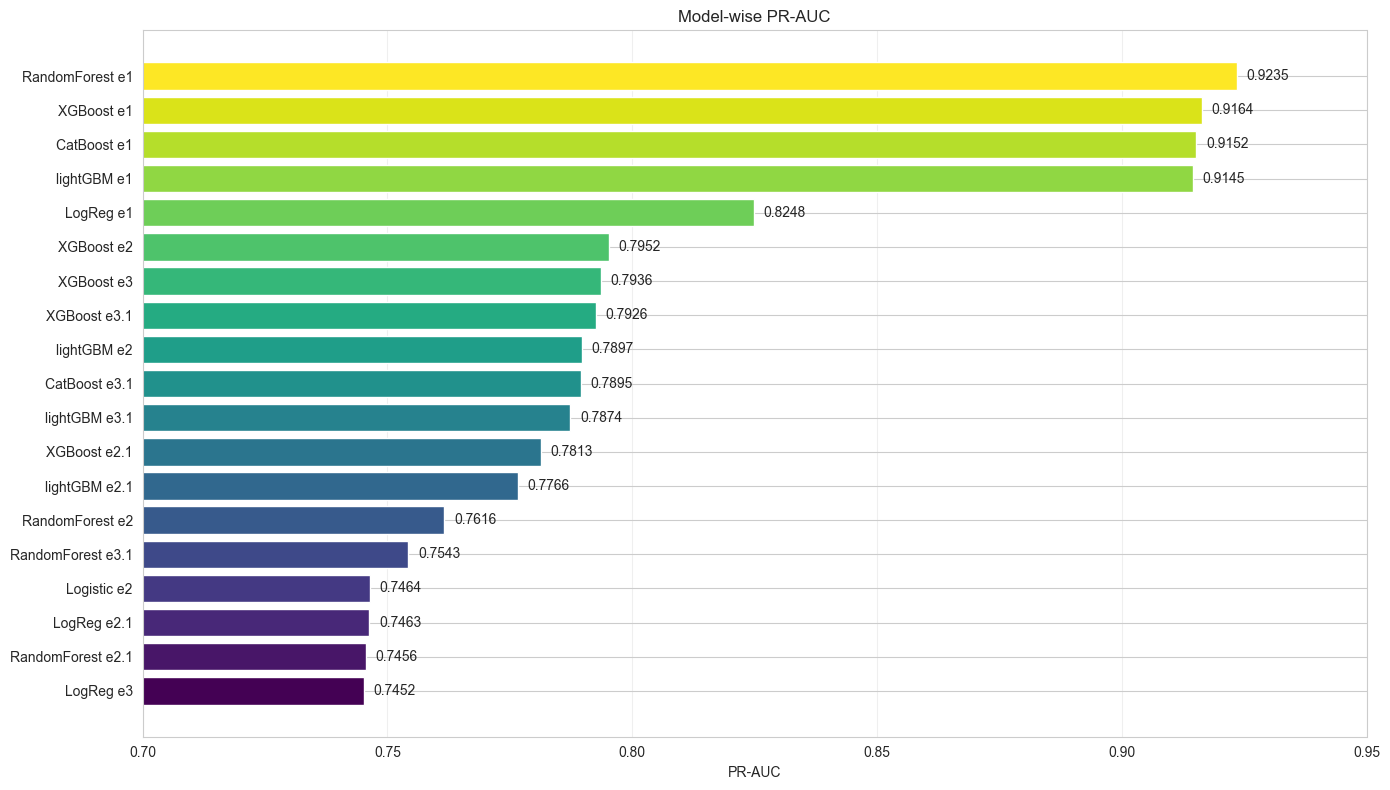

In [3]:
# PR-AUC 수평 막대 그래프
plt.figure(figsize=(14, 8))
plot_df = df.sort_values('pr_auc')
colors = plt.cm.viridis(np.linspace(0, 1, len(plot_df)))

plt.barh(plot_df['model'], plot_df['pr_auc'], color=colors)
plt.xlabel('PR-AUC')
plt.title('Model-wise PR-AUC')
plt.xlim(0.7, 0.95)
plt.grid(axis='x', alpha=0.3)

for i, (m, v) in enumerate(zip(plot_df['model'], plot_df['pr_auc'])):
    plt.text(v + 0.002, i, f"{v:.4f}", va='center')

plt.tight_layout()
plt.show()


## 2. 모델별 Recall / Accuracy 비교


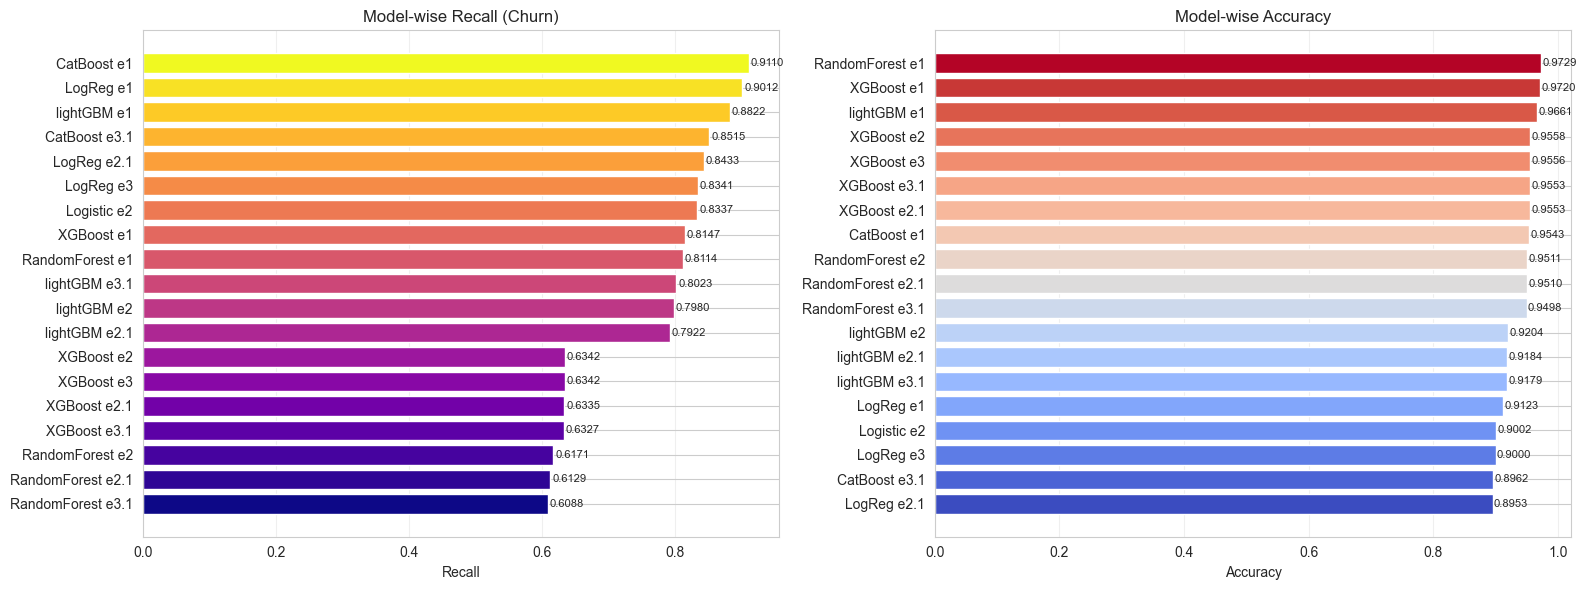

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Recall
plot_df = df.sort_values('recall')
axes[0].barh(plot_df['model'], plot_df['recall'], color=plt.cm.plasma(np.linspace(0, 1, len(plot_df))))
axes[0].set_title('Model-wise Recall (Churn)')
axes[0].set_xlabel('Recall')
axes[0].grid(axis='x', alpha=0.3)
for i, (m, v) in enumerate(zip(plot_df['model'], plot_df['recall'])):
    axes[0].text(v + 0.003, i, f"{v:.4f}", va='center', fontsize=8)

# Accuracy
plot_df2 = df.sort_values('accuracy')
axes[1].barh(plot_df2['model'], plot_df2['accuracy'], color=plt.cm.coolwarm(np.linspace(0, 1, len(plot_df2))))
axes[1].set_title('Model-wise Accuracy')
axes[1].set_xlabel('Accuracy')
axes[1].grid(axis='x', alpha=0.3)
for i, (m, v) in enumerate(zip(plot_df2['model'], plot_df2['accuracy'])):
    axes[1].text(v + 0.002, i, f"{v:.4f}", va='center', fontsize=8)

plt.tight_layout()
plt.show()


## 3. PR-AUC vs Recall 산점도 (크기=Accuracy)


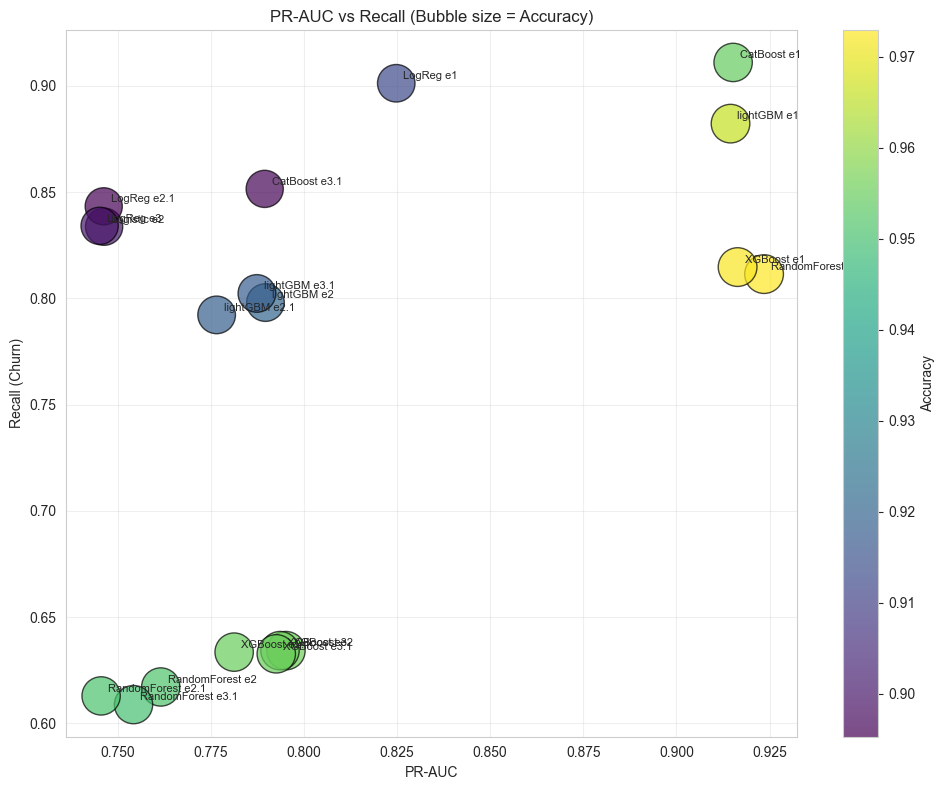

In [5]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['pr_auc'], df['recall'],
                     s=df['accuracy'] * 800,  # 크기
                     c=df['accuracy'], cmap='viridis',
                     alpha=0.7, edgecolors='black')

for _, row in df.iterrows():
    plt.annotate(row['model'], (row['pr_auc'], row['recall']),
                 textcoords='offset points', xytext=(5, 3), fontsize=8)

plt.xlabel('PR-AUC')
plt.ylabel('Recall (Churn)')
plt.title('PR-AUC vs Recall (Bubble size = Accuracy)')
plt.colorbar(scatter, label='Accuracy')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 4. 상위 모델 Confusion Matrix 시각화


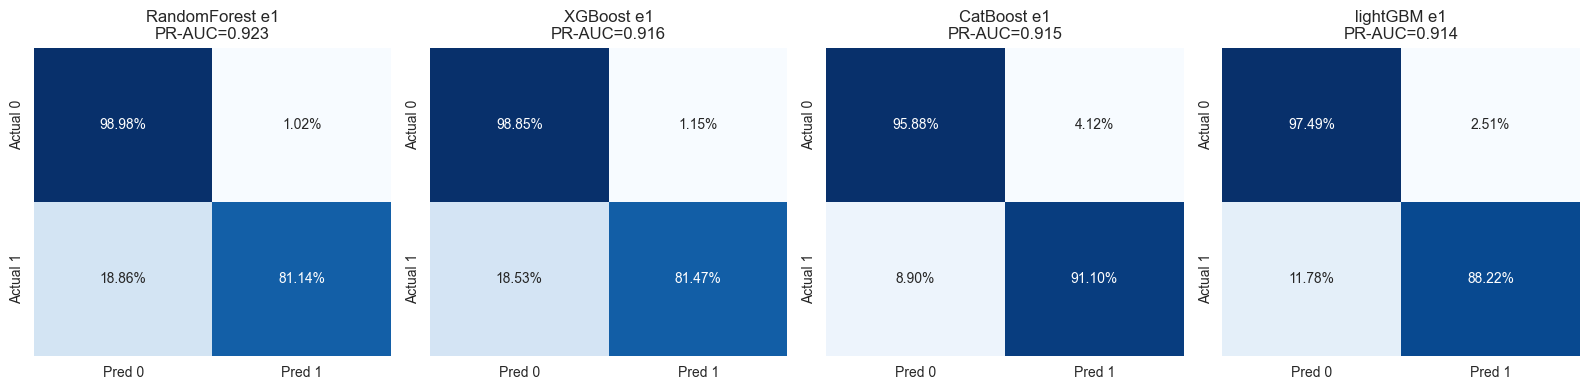

In [6]:
# PR-AUC 상위 4개 모델의 Confusion Matrix
from math import ceil

k = 4
top_k = df.sort_values('pr_auc', ascending=False).head(k)

fig, axes = plt.subplots(1, k, figsize=(4*k, 4))
if k == 1:
    axes = [axes]

for ax, (_, row) in zip(axes, top_k.iterrows()):
    cm = np.array(row['cm'])
    cm_norm = cm / cm.sum(axis=1, keepdims=True)
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Blues', cbar=False,
                xticklabels=['Pred 0','Pred 1'], yticklabels=['Actual 0','Actual 1'], ax=ax)
    ax.set_title(f"{row['model']}\nPR-AUC={row['pr_auc']:.3f}")

plt.tight_layout()
plt.show()


## 5. 성능 지표 상관관계


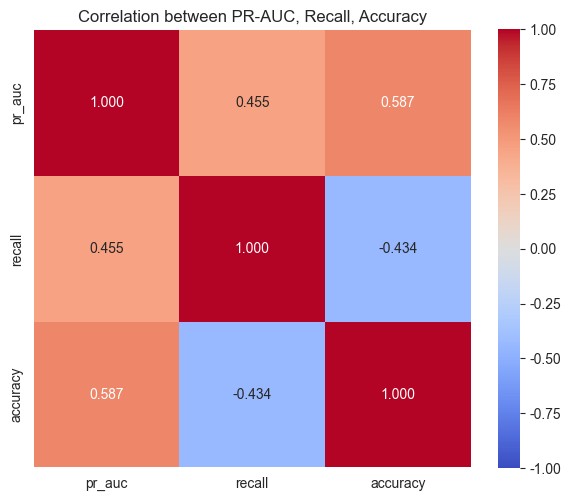

,pr_auc,recall,accuracy
pr_auc,1.000000,0.454767,0.587347
recall,0.454767,1.000000,-0.433865
accuracy,0.587347,-0.433865,1.000000


In [7]:
corr = df[['pr_auc', 'recall', 'accuracy']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt='.3f', cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation between PR-AUC, Recall, Accuracy')
plt.tight_layout()
plt.show()

corr
